<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 5 entries, sepal length to class
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64
     sepal length  sepal width  petal length  petal width           class
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object


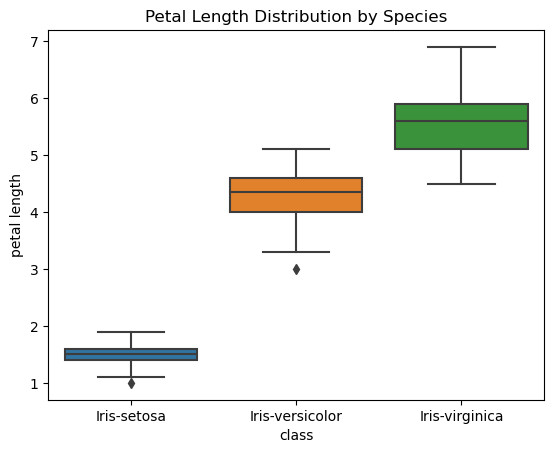

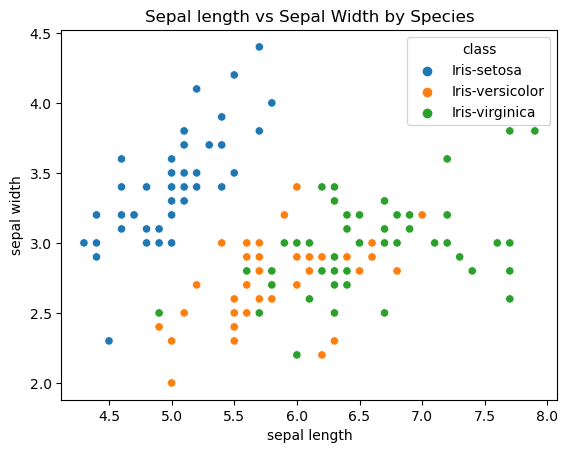

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


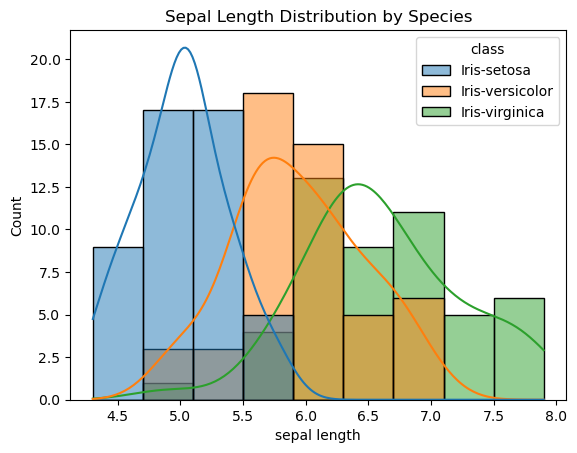

                sepal length                                               \
                       count      mean       std  min  25%  50%  75%  max   
class                                                                       
Iris-setosa             48.0  5.010417  0.359219  4.3  4.8  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936000  0.516171  4.9  5.6  5.9  6.3  7.0   
Iris-virginica          49.0  6.604082  0.632113  4.9  6.3  6.5  6.9  7.9   

                sepal width            ... petal length      petal width  \
                      count      mean  ...          75%  max       count   
class                                  ...                                 
Iris-setosa            48.0  3.431250  ...          1.6  1.9        48.0   
Iris-versicolor        50.0  2.770000  ...          4.6  5.1        50.0   
Iris-virginica         49.0  2.979592  ...          5.9  6.9        49.0   

                                                              
                 

In [363]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
 
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

iris_df = pd.concat([X, y], axis=1)
# print info about data types
iris_df.info(verbose=False)
# print summary of the dataframe
iris_df.describe()
# show the number of missing values for each column
print(iris_df.isnull().sum())
duplicates = iris_df[iris_df.duplicated()]
print(duplicates)
# Remove duplicates from dataset
iris_df.drop_duplicates(inplace=True)
# no missing value so no handling for missing values
# check inconsistencies
print(iris_df.dtypes) # no inconsistency

# boxplot visualization showing Petal Length Distribution by Species
sns.boxplot(x='class', y='petal length', data=iris_df)
plt.title("Petal Length Distribution by Species")
plt.show()

# scatterplot visualization showing Sepal length vs Sepal Width by Species
sns.scatterplot(x='sepal length', y='sepal width', hue='class', data=iris_df)
plt.title("Sepal length vs Sepal Width by Species")
plt.show()

# histogram visualization for Sepal Length Distribution for all species
sns.histplot(data=iris_df, x='sepal length', hue='class', kde=True)
plt.title('Sepal Length Distribution by Species')
plt.show()

summary_stats = iris_df.groupby('class').describe()
print(summary_stats)





#### Petal Length Distribution by Species
1. The boxplot clearly shows distinct separation between species based on petal length.
2. Iris-setosa has the smallest petal length, Iris-virginica has the largest, and Iris-versicolor is intermediate. This indicates petal length can be a good feature for distinguishing between species.
#### Sepal Length vs Sepal Width by Species
1. The scatterplot shows that Iris-setosa has a wider sepal width relative to its length compared to the other two. Although there’s overlap between Iris-versicolor and Iris-virginica, Iris-setosa stands out, we can see that sepal width could also help distinguish this species.
#### Sepal Length Distribution by Species
1. The histogram shows that Iris-setosa generally has the shortest sepal length, while Iris-virginica has a broader distribution with longer sepals.
2. The overlapping distributions of Iris-versicolor and Iris-virginica suggest that sepal length alone may not be sufficient to differentiate these two species but still adds valuable information for classification.